In [11]:
#import packages

In [12]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [13]:
#retireve final dataset

In [14]:
df=(r'C:\Users\abrah\OneDrive\Desktop\Data Science projects\Video games sales\finaldatasetvgsales.csv')
vsales=pd.read_csv(df)
vsales.describe()

,Unnamed: 0,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16594.000000,16594.000000,16594.000000,16594.000000,16594.000000,16594.000000,16594.000000,16594.000000
mean,8297.304869,8299.409967,2006.446065,0.264715,0.146687,0.077797,0.048073,0.537550
std,4791.070394,4791.349951,5.788537,0.816774,0.505407,0.309326,0.188610,1.555198
min,0.000000,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4148.250000,4150.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8297.500000,8299.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12445.750000,12447.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16597.000000,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


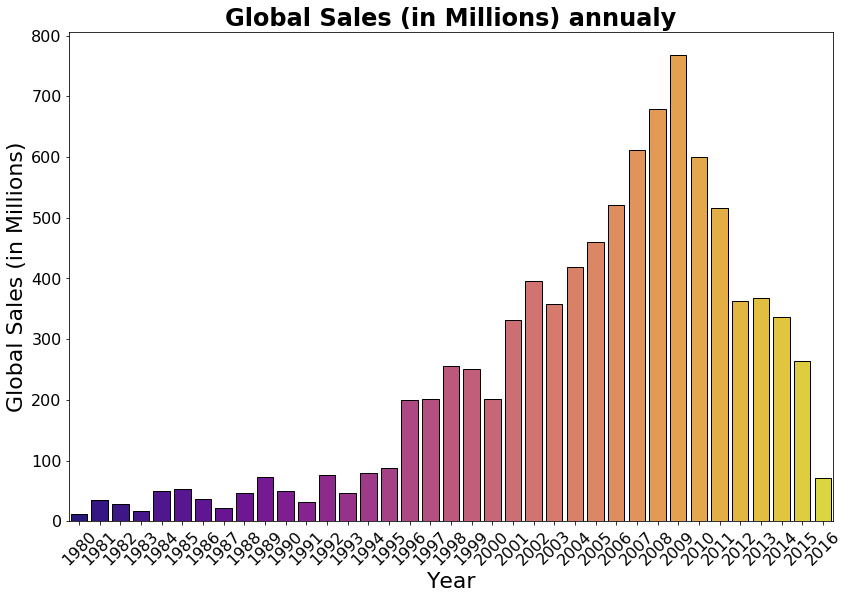

In [16]:
Annual_sales = vsales.groupby(['Year'])['Global_Sales'].sum()

box_plot_vsales = pd.DataFrame(columns=[str(int(i)) for i in Annual_sales.index])

for i in Annual_sales.index: box_plot_vsales.at[0, str(int(i))] = Annual_sales[i]

plt.figure(figsize=(13.7, 9))

sns.barplot(x='variable', y='value', data=pd.melt(box_plot_vsales), palette='plasma', ec='Black')

plt.ylabel('Global Sales (in Millions)', fontsize=22)
plt.xlabel('Year', fontsize=22)
plt.title('Global Sales (in Millions) annualy', fontsize=24, fontweight='bold')
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [17]:
# As per the chart above, global video games sales peaked in 2009 and has been declining since that year

In [18]:
vsales.corr()

,Unnamed: 0,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Unnamed: 0,1.000000,1.000000,0.177484,-0.401356,-0.379130,-0.267790,-0.332988,-0.427408
Rank,1.000000,1.000000,0.177487,-0.401366,-0.379140,-0.267798,-0.332997,-0.427419
Year,0.177484,0.177487,1.000000,-0.091391,0.005348,-0.170118,0.040446,-0.075206
NA_Sales,-0.401356,-0.401366,-0.091391,1.000000,0.767725,0.449783,0.634733,0.941047
EU_Sales,-0.379130,-0.379140,0.005348,0.767725,1.000000,0.435577,0.726381,0.902834
JP_Sales,-0.267790,-0.267798,-0.170118,0.449783,0.435577,1.000000,0.290178,0.611811
Other_Sales,-0.332988,-0.332997,0.040446,0.634733,0.726381,0.290178,1.000000,0.748327
Global_Sales,-0.427408,-0.427419,-0.075206,0.941047,0.902834,0.611811,0.748327,1.000000


In [20]:
#There appears to be strong correlation between sales of video games in North America and Europe. The correlation between those two regions and Japan's video game sales are not as strong.

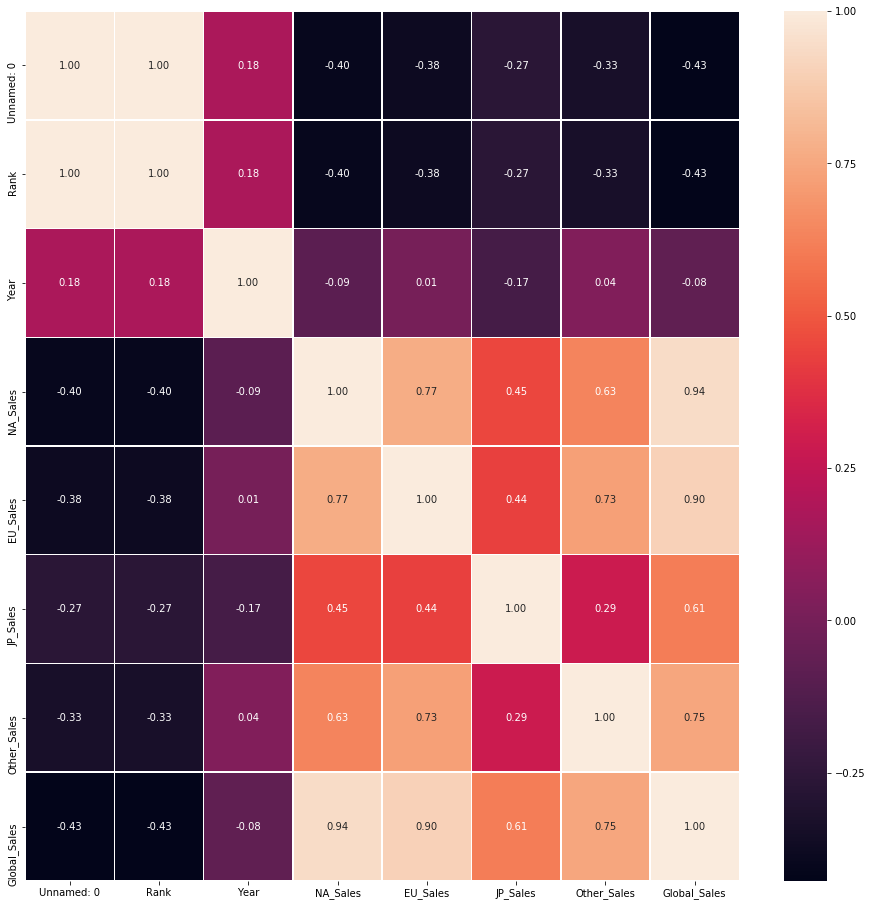

In [21]:
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(vsales.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

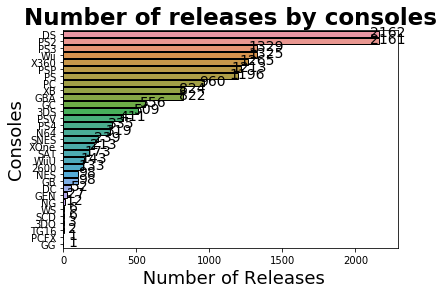

In [22]:
f, ax = plt.subplots()
Consoles_releases = vsales['Platform'].value_counts()

sns.barplot(x=Consoles_releases.values, y=Consoles_releases.index, ec='Black')
ax.set_title('Number of releases by consoles', fontweight='bold', fontsize=23)
ax.set_xlabel(' Number of Releases', fontsize=18)
ax.set_xlim(0, max(Consoles_releases.values)+130)
ax.set_ylabel('Consoles', fontsize=18)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 62,
            p.get_y() + p.get_height() / 2. + 0.28,
            int(width),
            ha="center", fontsize=14)

In [23]:
#As per the chart above, DS and PS2 released the most games

In [24]:
vsales['Genre'].value_counts()

Action          3315
Sports          2346
Misc            1739
Role-Playing    1486
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       866
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [25]:
#Action is the genre that has the most games, followed by sports games. Puzzle games is the least common genre.

Genre
Action          1751.17
Sports          1330.93
Shooter         1037.37
Role-Playing     927.33
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       391.91
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


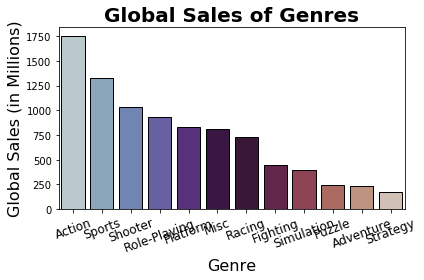

In [26]:
genre_global_sales = vsales.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)
print(genre_global_sales)
sns.barplot(x=genre_global_sales.index, y=genre_global_sales.values, ec='Black', palette='twilight')
plt.xticks(rotation=20, fontsize=12)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Global Sales (in Millions)', fontsize=16)
plt.title('Global Sales of Genres', fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

In [27]:
#Action games sold the most copies, followed by sports games. It appears that games that stimulates more excitement and stimulates more activity such as 'Action', 'Sports' and 'Shooter' sells more copies than games that require more thinking and are slower paced such as 'Puzzle' AND 'Strategy' games